In [214]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [215]:
# Import data and preprocessing
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

df_netherlands = df[(df['location'] == "Netherlands")]

X = pd.to_datetime(df_netherlands['date'])
y = df_netherlands[['total_cases']]

C:\Users\nguye\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[]

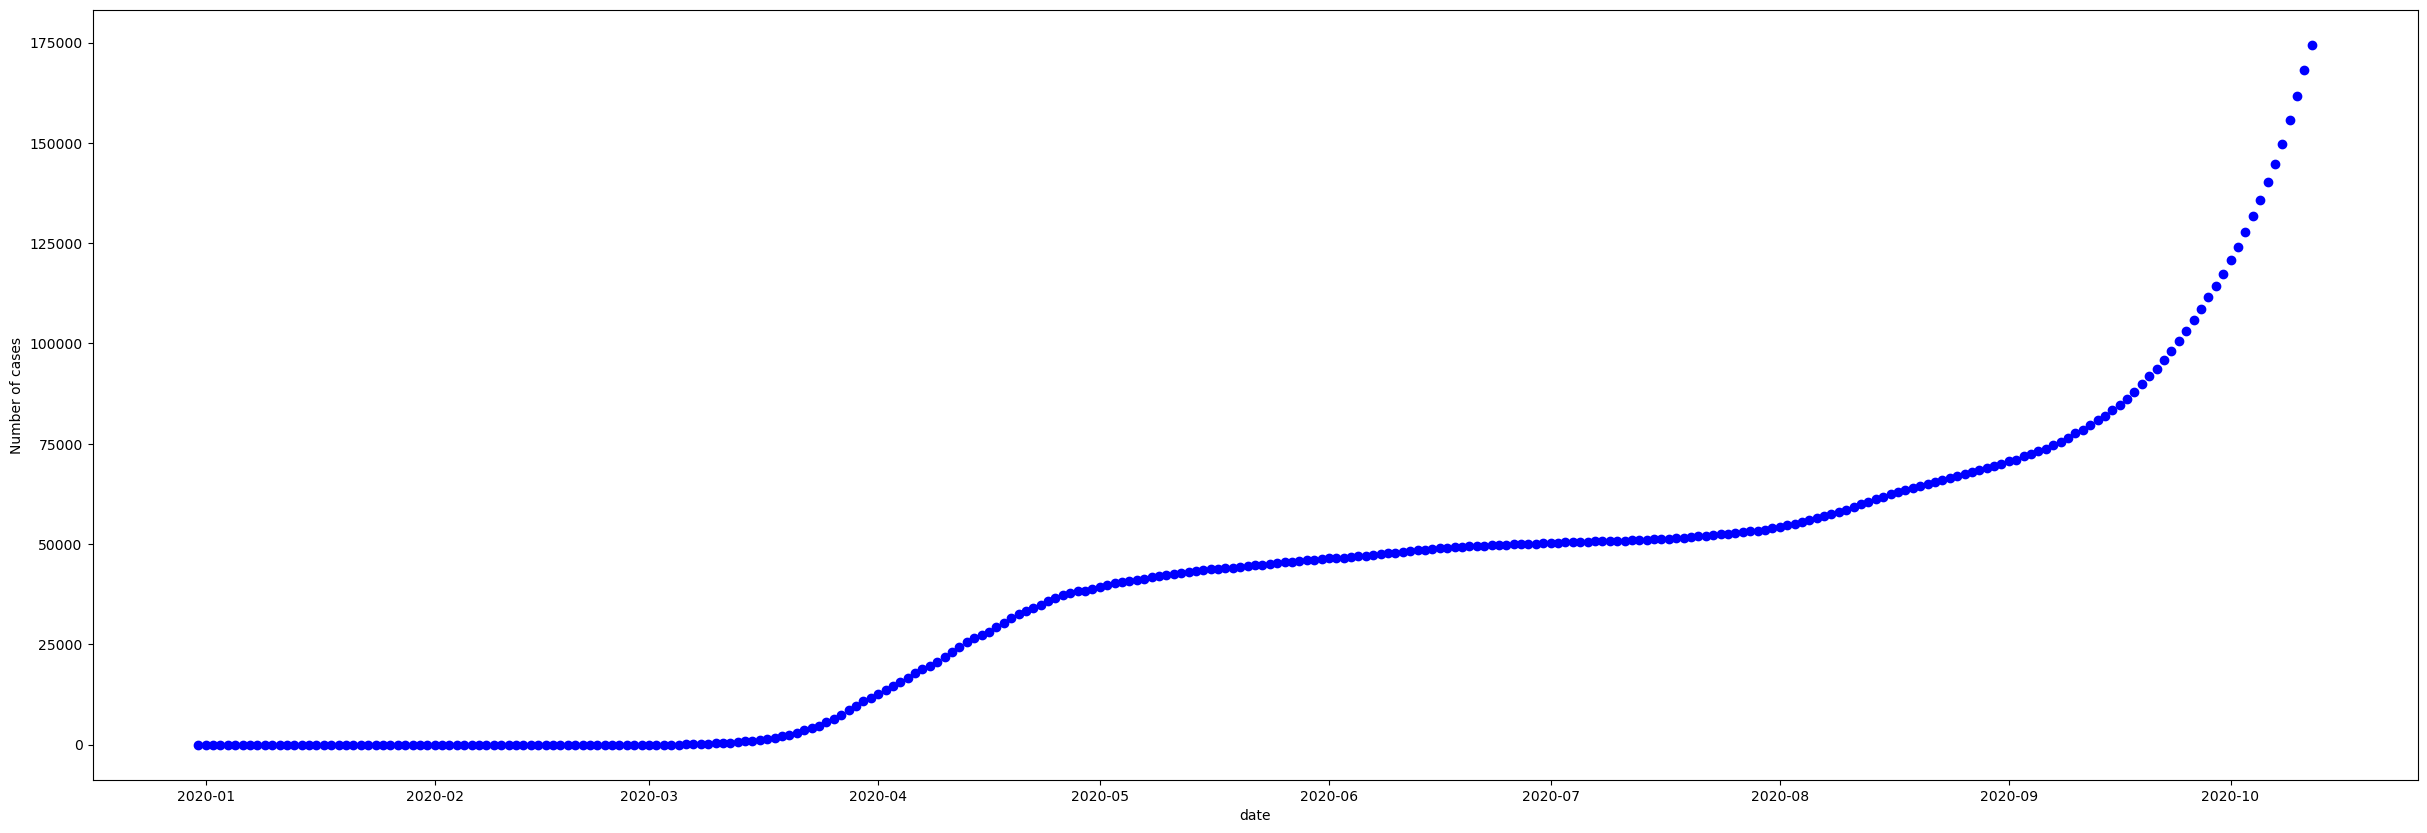

In [216]:
# Plotting the information
plt.rcParams["figure.figsize"] = (30, 10)
plt.scatter(X, y, color="blue")
plt.xlabel('date')
plt.ylabel('Number of cases')
plt.plot()

0.8427521380596705


[]

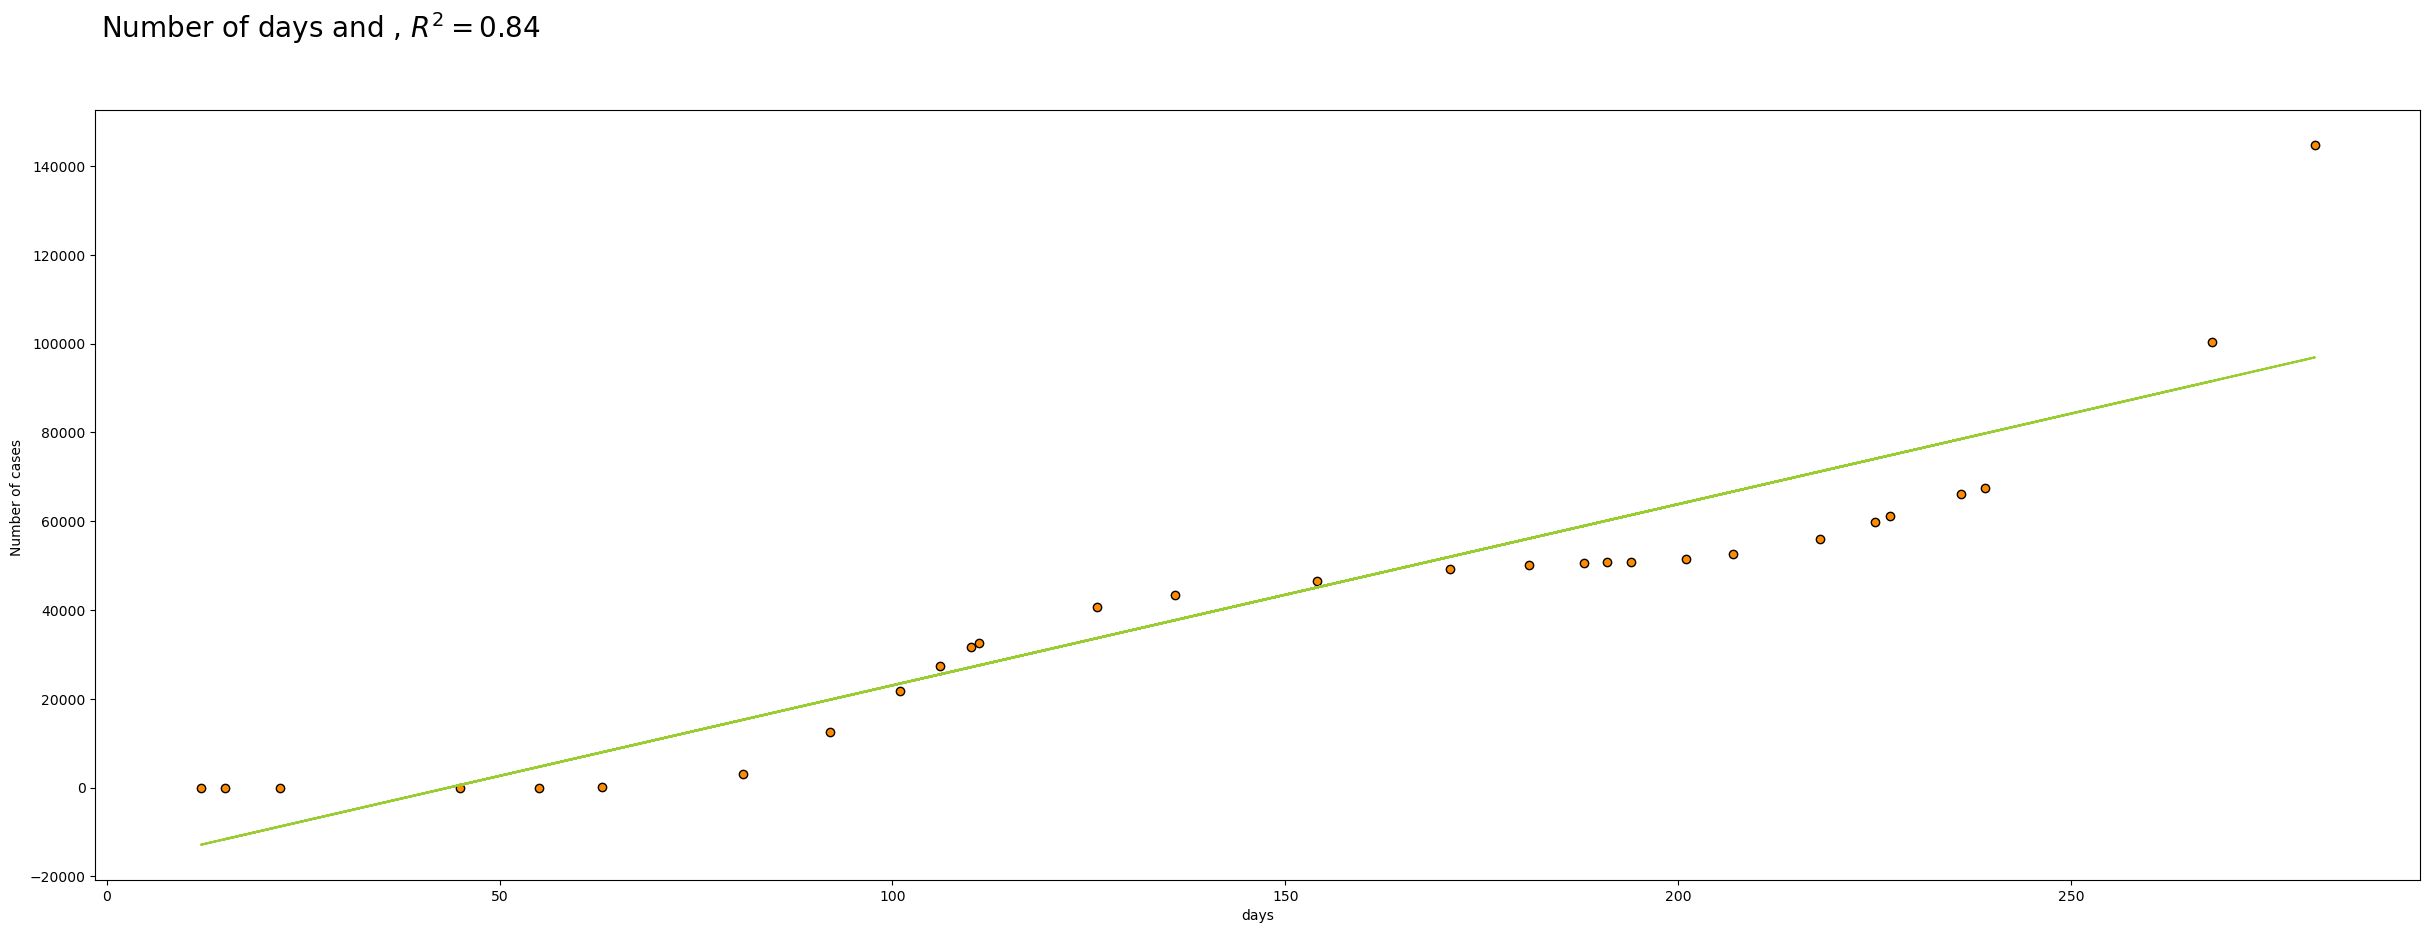

In [317]:

df_netherlands['time'] = np.arange(len(df_netherlands.index))
X = df_netherlands[['time']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
r2 = lr.score(X_test, y_test)
print(r2)
# this is the multiple R-squared of the prediction. This is measured how well the prediction line was predicted
# The score is quite impressive given the input data and the complex nature bahaviour of the virus. However, I think we can do better with other models  

# plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_test, predictions, color="yellowgreen")
plt.suptitle('Number of days and {0}, $R^2 = %.2f$'.format("") % r2, fontsize=20, x=0.2)
plt.xlabel('days')
plt.ylabel('Number of cases ')
plt.plot()

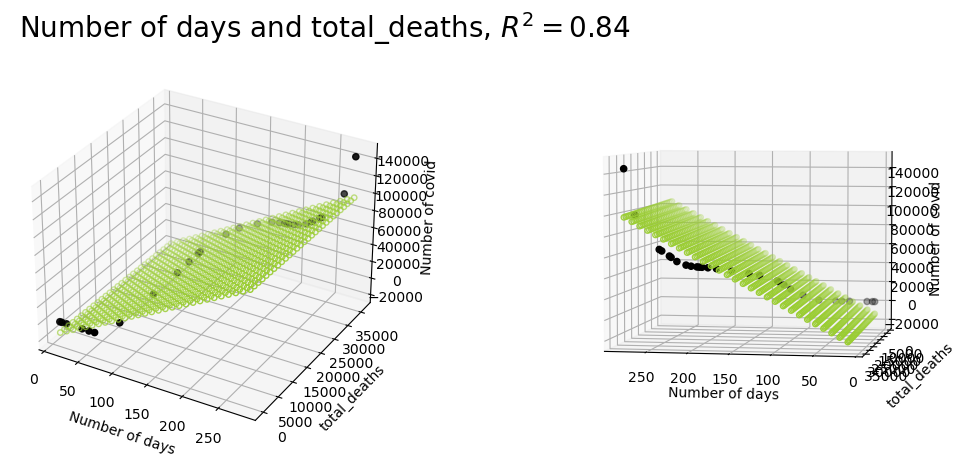

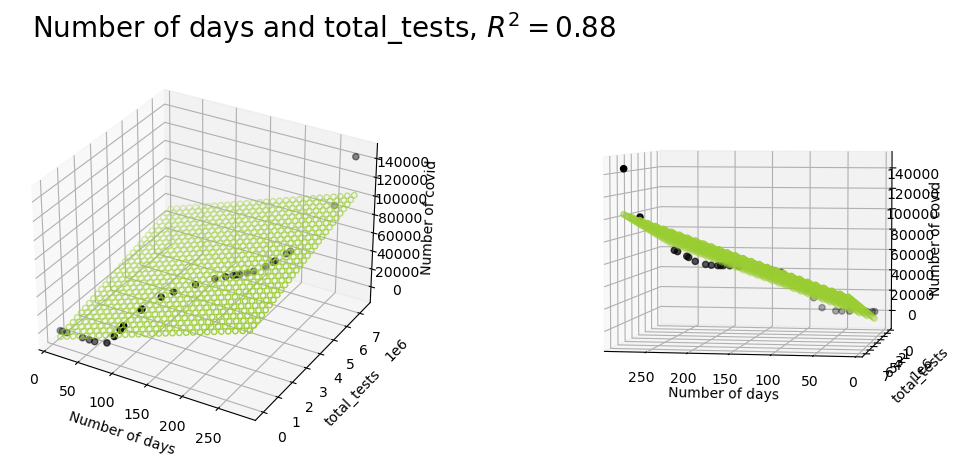

In [314]:
# Data preparation
df = df[(df['location'] == "Italy")]
df['time'] = np.arange(len(df.index))

total_population = df.iloc[0]['population']

cs = ['total_deaths', 'total_tests']

for i in cs:
  X2  = df[["time", i]]
  y = df_netherlands[['total_cases']]

  # Split data into train (90%) and test (10%)
  X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size =0.1, random_state = 0)

  # Preparing data for visualization
  x_pred = np.linspace(X_test['time'].min(), X_test['time'].max(), 29) 
  y_pred = np.linspace(X_test[i].min(), X_test[i].max(), 29) 

  xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
  model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

  # Train
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  predictions = lr.predict(model_viz)

  # Evaluate
  r2 = lr.score(X_test, y_test)
  r2

  # Plot

  fig = plt.figure(figsize=(20, 5))

  ax1 = fig.add_subplot(131, projection='3d')
  ax2 = fig.add_subplot(132, projection='3d')

  axes = [ax1, ax2]

  for ax in axes:
    ax.scatter(X_test['time'], X_test[i], y_test, c='black')
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predictions, facecolor=(0,0,0,0), s=15, edgecolor='yellowgreen')
    ax.set_xlabel('Number of days')
    ax.set_ylabel(i) # filter out _ char
    ax.set_zlabel('Number of covid')
    ax.locator_params(nbins=7, axis='x')

  fig.suptitle('Number of days and {0}, $R^2 = %.2f$'.format(i) % r2, fontsize=20, x=0.3)

  ax2.view_init(elev=4, azim=100)

